In [2]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería
### Sebastián Flores
https://www.github.com/usantamaria/mat281

## Clase anterior

***Clustering***
* ¿Cómo se llamaba el algoritmo que vimos? 
* ¿Cuándo funcionaba y cuándo fallaba?

## ¿Qué veremos hoy?
Regresión lineal.

## ¿Porqué veremos ese contenido?
Porque regresión lineal es universalmente utilizado, y la derivación del método nos entrega importantes consideraciones sobre su implementación, sus hipótesis y sus posibles extensiones.

## Ejemplo 2D
Consideremos los siguientes datos:
[link](http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)

In [5]:
%%bash
head data/x01.txt -n 60

#  x01.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    S Weisberg,
#    Applied Linear Regression,
#    Wiley, 1980, pages 128-129.
#
#  Discussion:
#
#    The data records the average weight of the brain and body for
#    a number of mammal species.  
#
#    There are 62 rows of data.  The 3 data columns include:
#
#      I,  the index,
#      A1, the brain weight;
#      B,  the body weight.
#
#    We seek a model of the form:
#
#      B = A1 * X1.
#
3 columns
62 rows
Index
Brain Weight
Body Weight
 1     3.385    44.500
 2     0.480    15.500
 3     1.350     8.100
 4   465.000   423.000
 5    36.330   119.500
 6    27.660   115.000
 7    14.830    98.200
 8     1.040     5.500
 9     4.190    58.000
10     0.425     6.400
11     0.101     4.000
12     0.920     5.700
13     1.000     6.600
14     0.005     0.140
15     0.060     1.000
16     3.500    10.800
17     2.00

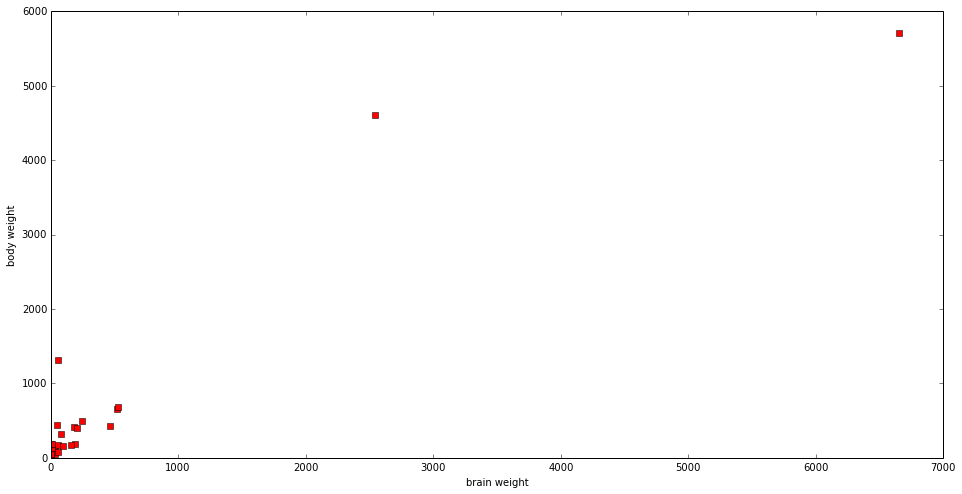

In [4]:
import numpy as np
from matplotlib import pyplot as plt
# Plot of data
data = np.loadtxt("data/x01.txt", skiprows=33)
x = data[:,1]
y = data[:,2]
plt.figure(figsize=(16,8))
plt.plot(x, y, 'rs')
plt.xlabel("brain weight")
plt.ylabel("body weight")
plt.show()

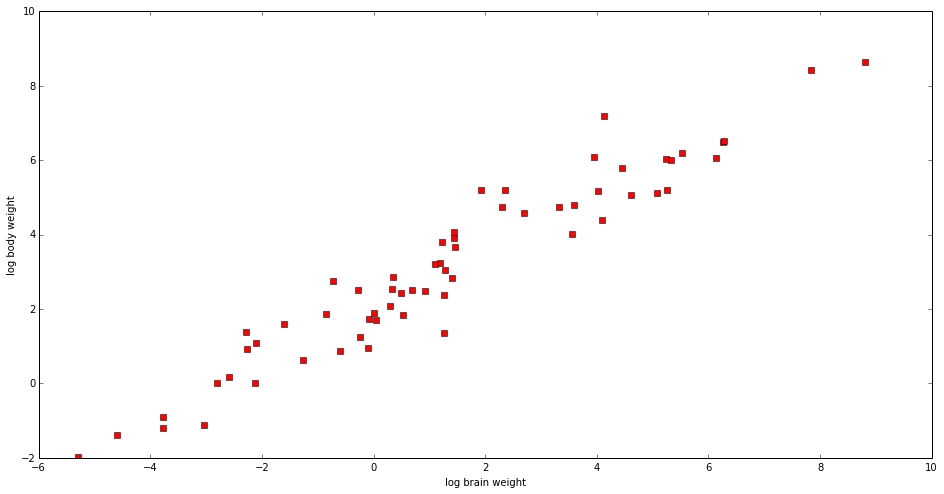

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# Plot of data
data = np.loadtxt("data/x01.txt", skiprows=33)
x = np.log(data[:,1])
y = np.log(data[:,2])
plt.figure(figsize=(16,8))
plt.plot(x, y, 'rs')
plt.xlabel("log brain weight")
plt.ylabel("log body weight")
plt.show()

## Ejemplo 3D
Consideremos los siguientes datos

In [7]:
%%bash
head data/x06.txt -n 40

#  x06.txt
#
#  Reference:
#
#    R J Freund and P D Minton,
#    Regression Methods,
#    Dekker, 1979, page 111.
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 305,
#    ISBN 0-12-656460-4.
#
#  Discussion:
#
#    The length of a species of fish is to be represented as a function
#    of the age and water temperature.  The fish are kept in tanks
#    at 25, 27, 29 and 31 degrees Celsius.  After birth, a test specimen
#    is chosen at random every 14 days and its length measured.
#
#    There are 44 rows of data.  The data include:
#
#      I,  the index;
#      A1, the age of the fish;
#      A2, the water temperature in degrees Celsius;
#      B,  the length of the fish.
#
#    We seek a model of the form:
#
#      B = A1 * X1 + A2 * X2
#
4 columns
44 rows
Index
Age of fish (days)
Temperature of water (degrees Celsius)
Length of fish
 1   14  25   620
 2   28  25  1315
 3   41  25  2120


In [9]:
%matplotlib gtk
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Plot of data
data = np.loadtxt("data/x06.txt", skiprows=37)
x = data[:,1]
y = data[:,2]
z = data[:,3]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'rs')
plt.xlabel("age [days]")
plt.ylabel("Water Temperature [C]")
plt.title("Length")
plt.show()

/usr/lib/pymodules/python2.7/mpl_toolkits/mplot3d/axes3d.py:1088: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.button_pressed in self._rotate_btn:
/usr/lib/pymodules/python2.7/matplotlib/backends/backend_gtk.py:250: Warning: Source ID 12 was not found when attempting to remove it
  gobject.source_remove(self._idle_event_id)


In [10]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Plot of data
data = np.loadtxt("data/x06.txt", skiprows=37)
x = np.log(data[:,1])
y = np.log(data[:,2])
z = np.log(data[:,3])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'rs')
plt.xlabel("age [days]")
plt.ylabel("Water Temperature [C]")
plt.title("Length")
plt.show()

## Los datos

Supondremos que tenemos $m$ datos. 
Cada dato $x^{(i)}$, $i=1,\dots,$ $m$ tiene $n$ componentes,
$x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$. 

Conocemos además el valor (etiqueta) asociado a $x^{(i)}$ que llamaremos $y^{(i)}$, $i=1,\dots, m$ .

## Modelo

Nuestra hipótesis de modelo lineal puede escribirse como

$$\begin{aligned}
h_{\theta}(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \\
          &= \begin{bmatrix}\theta_0 & \theta_1 & \theta_2 & \dots & \theta_n\end{bmatrix} \begin{bmatrix}1 \\ x_1 \\x_2 \\ \vdots \\ x_n\end{bmatrix} \\
          &= \theta^T \begin{bmatrix}1\\x\end{bmatrix} = \begin{bmatrix}1 & x^T\end{bmatrix} \theta \end{aligned}$$


## Modelo

Definiremos $x^{(i)}_0 =1$, de modo que
$h_{\theta}(x^{(i)}) = (x^{(i)})^T \theta $ y buscamos el vector de parámetros
$$\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}$$


## Modelo
Definamos las matrices

$$\begin{aligned}
Y &= \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}\end{aligned}$$

y

$$\begin{aligned}
X = 
\begin{bmatrix} 
1 & x^{(1)}_1 & \dots & x^{(1)}_n \\ 
1 & x^{(2)}_1 & \dots & x^{(2)}_n \\
\vdots & \vdots & & \vdots \\
1 & x^{(m)}_1 & \dots & x^{(m)}_n \\
\end{bmatrix}
= 
\begin{bmatrix} 
- (x^{(1)})^T - \\ 
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\
\end{bmatrix}\end{aligned}$$


## Modelo

Luego la evaluación
de todos los datos puede escribirse matricialmente como

$$\begin{aligned}
X \theta &= 
\begin{bmatrix}
1 & x_1^{(1)} & ... & x_n^{(1)} \\
\vdots & \vdots & & \vdots \\
1 & x_1^{(m)} & ... & x_n^{(m)} \\
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_n\end{bmatrix} \\
& = 
\begin{bmatrix}
1 \theta_0 + x^{(1)}_1 \theta_1 + ... + x^{(1)}_n \theta_n \\
\vdots \\
1 \theta_0 + x^{(m)}_1 \theta_1 + ... + x^{(m)}_n \theta_n \\
\end{bmatrix} \\
& = 
\begin{bmatrix}
h(x^{(1)}) \\
\vdots \\
h(x^{(m)})
\end{bmatrix}\end{aligned}$$


## Modelo

Nuestro problema es
encontrar un “buen” conjunto de valores $\theta$ de modo que

$$\begin{aligned}
\begin{bmatrix}
h(x^{(1)}) \\
h(x^{(2)}) \\
\vdots \\
h(x^{(m)})
\end{bmatrix}
\approx
\begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}\end{aligned}$$

es decir, que $$X \theta \approx Y$$

## Modelo

Para encontrar el mejor vector $\theta$ podríamos definir una función de costo $J(\theta)$ de la siguiente manera:

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

El mejor vector $\theta$ sería aquel que permite minimizar la norma 2 entre la predicción y el valor real.

## Aproximación Ingenieril

¿Cómo podemos resolver el problema
en el menor número de pasos?

Deseamos resolver el sistema $$A \theta = b$$ con
$A \in \mathbb{R}^{m \times n}$ y $m > n$ (La matrix $A$ es skinny).

¿Cómo resolvemos?

## Aproximación Ingenieril

Bueno,
si $A \in \mathbb{R}^{m \times n}$, entonces
$A^T \in \mathbb{R}^{n \times m}$ y la multiplicación está bien definida
y obtengo un sistema lineal $n \times n$. $$(A^T A) \  \theta = A^T b$$ Si la
matriz $A^T A$ es invertible, el sistema se puede solucionar “sin mayor
reparo”. $$\theta = (A^T A)^{-1} A^T b$$

## Aproximación Ingenieril

En
nuestro caso, obtendríamos $$\theta = (X^T X)^{-1} X^T Y$$ Esta
respuesta, aunque correcta, no admite interpretaciones y no permite
generalizar a otros casos más generales.

En particular...

-   ¿Qué relación tiene con la función de costo (no) utilizada?

-   ¿Qué pasa si $A^T A$ no es invertible?


## Aproximación Machine Learning

¿Cómo podemos obtener una
buena aproximación para $\theta$?

Queremos encontrar $\theta^*$ que minimice $J(\theta)$.

Basta con utilizar una buena rutina de optimización para cumplir con
dicho objetivo.

En particular, una elección natural es tomar la dirección de mayor
descenso, es decir, el método del máximo descenso (gradient descent).
$$\theta^{(n+1)} = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)})$$
donde $\alpha >0$ es la tasa de aprendizaje.


## Aproximación Machine Learning

En
nuestro caso, puesto que tenemos
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
se tiene que

$$\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_k} &=
\frac{\partial }{\partial \theta_k} \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 \\
&= \frac{1}{2} \sum_{i=1}^{m}  2 \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \frac{\partial h_{\theta}(x^{(i)})}{\partial \theta_k}  \\
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$


## Aproximación Machine Learning

Este
algoritmo se llama Least Mean Squares

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)}) \\
\frac{\partial J(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$

OBS: La elección de $\alpha$ es crucial para la convergencia. En
particular, $0.01/m$ funciona bien.

In [24]:
import numpy as np
from numpy.linalg import norm
def lms_regression_slow(X, Y, theta, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    while not converged:
        gradient = 0.
        for xiT, yi in zip(X,Y):
            hi = np.dot(theta, xiT)
            gradient += (hi - yi)*xiT.T
        new_theta = theta - alpha * gradient
        converged = norm(theta-new_theta) < tol * norm(theta)
        theta = new_theta
    return theta

def lms_regression_fast(X, Y, theta, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    theta = theta.reshape(X.shape[1], 1)
    A = np.dot(X.T,X)
    b = np.dot(X.T, Y)
    while not converged:
        gradient = np.dot(A, theta) - b
        new_theta = theta - alpha * gradient
        converged = norm(theta-new_theta) < tol * norm(theta)
        theta = new_theta
    return theta

m = 1000
t = np.linspace(0,1,m)
x = 2 + 2*t
y = 300 + 100*t
X = np.array([np.ones(m), x]).T
Y = y.reshape(m,1)
theta_0 = np.array([[0.0,0.0]])
theta = lms_regression_fast(X, Y, theta_0)
print theta

[[ 199.39672176]
 [  50.19457286]]


## Aproximación Machine Learning
#### Least Mean Squares

Resultados:

-   Tarda del orden de 4 segundos para un problema ridículamente
    pequeño.

-   Precisión no es tan buena como esperábamos $\theta=(199.45, 50.17)$
    en vez de $(200, 50)$.

-   ¿Hay algo mejor que se pueda hacer?


## Interpretación Matemática
**¿Cómo podemos obtener una
justificación para la ecuación normal?**

Necesitamos los siguientes ingredientes:

$$\begin{aligned}
\nabla_x &(x^T A x) = A x + A^T x \\ 
\nabla_x &(b^T x) = b \end{aligned}$$

## Interpretación Matemática
Se tiene

$$\begin{aligned}
J(\theta) 
&= \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 \\
&= \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \\
&= \frac{1}{2} \left( X \theta - Y \right)^T \left( X \theta - Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T - Y^T \right) \left( X \theta - Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T X \theta - \theta^T X^T Y - Y^T X \theta + Y^T Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T X \theta - 2 (Y^T X) \theta + Y^T Y \right)\end{aligned}$$

## Interpretación Matemática

Aplicando a cada uno de los términos, obtenemos:

$$\begin{aligned}
\nabla_\theta ( \theta^T X^T X \theta ) &= X^T X \theta + (X^T X)^T \theta \\
& = 2 X^T X \theta\end{aligned}$$

también se tiene

$$\begin{aligned}
\nabla_\theta ( Y^T X \theta  ) &= (Y^T X) ^T\\
&= X^T Y\end{aligned}$$

y por último

$$\begin{aligned}
\nabla_\theta ( Y^T Y  ) = 0\end{aligned}$$

## Interpretación Matemática

Por lo tanto se tiene que

$$\begin{aligned}
\nabla_\theta J(\theta) 
& = \nabla_\theta  \frac{1}{2} \left( \theta^T X^T X \theta - 2 (Y^T X) \theta + Y^T Y \right) \\
&= \frac{1}{2} ( 2 X^T X \theta - 2 X^T Y + 0 ) \\
&= X^T X \theta - X^T Y \end{aligned}$$


## Interpretación Matemática

Esto significa que el problema $$\min_\theta J(\theta)$$ se resuelve al
hacer todas las derivadas parciales iguales a cero (ie, gradiente igual
a cero) $$\nabla_\theta J(\theta) = 0$$ lo cual en nuestro caso se
convierte convenientemente a la ecuación normal $$X^T X \theta = X^T Y$$
y se tiene $$\theta = (X^T X)^{-1} X^T Y$$


In [21]:
import numpy as np
from numpy.linalg import norm
def matrix_regression(X, Y, theta, tol=1E-6):
    A = np.dot(X.T,X)
    b = np.dot(X.T,Y)
    sol = np.linalg.solve(A,b)
    return sol.flatten()

m = 100
t = np.linspace(0,1,m)
x = 2 + 2*t
y = 300 + 100*t
X = np.array([np.ones(m), x]).T
Y = y.reshape(m,1)
theta_0 = np.array([[0.0,0.0]])
theta = matrix_regression(X, Y, theta_0)
print theta

[ 200.   50.]


## Aproximación Matemática

Resultados:

-   Tarda mucho menos que LMS para un problema pequeño.

-   Precisión es buena: $(200, 50)$.

-   Problema potencial es tener suficiente memoria RAM: $X^T X$ puede ser una matriz costosa de conseguir, aunque es sólo de tamaño $n\times n$, con $n$ el tamaño del vector $\theta$. 


## Interpretación Probabilística

#### ¿Porqué la función de costo $J(\theta)$ en norma $2$ resulta adecuada?

Asumamos que outputs e inputs están relacionados mediante
$$y^{(i)}= \theta^T x^{(i)}+ \varepsilon^{(i)}$$ donde
$\varepsilon^{(i)}$ es un error que captura efectos sin modelar o ruido
de medición. 

Supongamos que los $\varepsilon^{(i)}$ se distribuyen
de manera idéntica e independientemente de acuerdo a una distribución
gausiana de media $0$ y varianza $\sigma^2$.
$$\varepsilon^{(i)}\sim \mathcal{N}(0, \sigma^2)$$



## Interpretación Probabilística

Cabe destacar que:

-   $\theta$ no es una variable aleatoria, es un parámetro
    (desconocido).

-   $\varepsilon^{(i)}$, $x^{(i)}$ y $y^{(i)}$ son variables aleatorias.

-   $\varepsilon^{(i)}\sim \mathcal{N}(0, \sigma^2)$

-   $y^{(i)} \ | \ x^{(i)}; \theta \sim \mathcal{N}(\theta^T x^{(i)}, \sigma^2)$
    pues $y^{(i)}= \theta^T x^{(i)}+ \varepsilon^{(i)}$


## Interpretación Probabilística

Tenemos entonces que
$$\mathbb{P}[\varepsilon^{(i)}] = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(\varepsilon^{(i)})^2}{2\sigma^2} \right)$$
y por tanto
$$\mathbb{P}[y^{(i)}\ | \ x^{(i)}; \theta ] = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right)$$


## Interpretación Probabilística

La función de verosimilitud $L(\theta)$ nos
permite entender que tan probable es encontrar los datos observados,
para una elección del parámetro $\theta$.

$$\begin{aligned}
L(\theta) 
&= \prod_{i=1}^{m} \mathbb{P}[y^{(i)}| x^{(i)}; \theta ] \\
&= \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right) \\
&= \frac{1}{(\sqrt{2\pi}\sigma)^{m}} \exp\left( - \sum_{i=1}^{m}  \frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right)\end{aligned}$$

Nos gustaría encontrar el parámetro $\theta$ que más probablemente haya
generado los datos observados, es decir, el parámetro $\theta$ que
maximiza la función de verosimilitud.

## Interpretación Probabilística
-   Maximizar la verosimilitud $L(\theta)$ es lo mismo que maximizar la
    función de log-verosimitud $l(\theta)=\log(L(\theta))$ puesto que
    $\log$ es una función monótonamente creciente.

-   Maximizar $-f(\theta)$ es lo mismo que minimizar $f(\theta)$.



## Interpretación Probabilística

$$\begin{aligned}
l(\theta) 
&= \log( L(\theta) \\
&= \log\left[ \frac{1}{(\sqrt{2\pi}\sigma)^{m}} \exp\left( - \sum_{i=1}^{m}  \frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right) \right] \\
&= - m \log (\sqrt{2\pi} \sigma) - \frac{1}{\sigma^2} \frac{1}{2} \sum_{i=1}^{m} \left( y^{(i)} - \theta^T x^{(i)}\right)^2 \end{aligned}$$

Es decir, la función costo $J(\theta)$ cuadrática puede interpretarse
como un intento por encontrar el parámetro $\theta$ más probable bajo la
hipótesis que el error en $y$ es gaussiano.


## Aspectos Prácticos

#### ¿Cómo se aplica regresión en realidad?

Al realizar regresión, conviene normalizar/estandarizar los datos, es
decir transformarlos para que tengan una escala común:

-   Utilizando la media y la desviación estándar
    $$\frac{x_i-\overline{x_i}}{\sigma_{x_i}}$$

-   Utilizando mínimos y máximos
    $$\frac{x_i-\min{x_i}}{\max{x_i} - \min{x_i}}$$

## Aspectos Prácticos

#### ¿Porqué normalizar?

-   Los valores numéricos poseen escalas de magnitud distintas.

-   Las variables tienen distintos significados físicos.

-   Algoritmos funcionan mejor.

-   Interpretación de resultados es más sencilla.


## Ejemplo en Boston House-price

In [27]:
from sklearn import datasets
# The data
boston = datasets.load_boston()
X = boston.data
Y = boston.target
#print X
#print Y
# What’s the data
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [29]:
from sklearn import datasets
import numpy as np
#from mat281_code.lms import lms_regression as lms
from sklearn import linear_model
# The data
boston = datasets.load_boston()
X = boston.data
Y = boston.target
m = X.shape[0]

# Normalization of data
#X_train_aux = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
#Y_train_aux = (Y-Y.min())/(Y.max()-Y.min())

X_train_aux = (X-X.mean(axis=0))/X.std(axis=0)
Y_train_aux = (Y-Y.mean())/Y.std()
# Put in shape for normal equations
X_train = np.hstack([np.ones([m,1]), X_train_aux])
Y_train = Y_train_aux.reshape(m,1)

# Direct Solution
theta = np.linalg.solve(np.dot(X_train.T, X_train), 
                        np.dot(X_train.T, Y_train))
print theta.flatten()

# sklearn solution
regr = linear_model.LinearRegression()
regr.fit(X_train_aux, Y_train_aux)
theta = regr.intercept_, regr.coef_
print theta

# LMS Solution - Tarda mucho
#theta0 = Y_train.mean()/X_train.mean(axis=0)/X.shape[1]
#theta = lms(X_train, Y_train, theta0)
#print theta

[  3.97159963e+00  -1.00175225e-01   1.17651199e-01   1.55601811e-02
   7.42493038e-02  -2.24215267e-01   2.90665875e-01   2.29871616e-03
  -3.37880295e-01   2.89375620e-01  -2.25935517e-01  -2.24439849e-01
   9.32345842e-02  -4.07996856e-01]
(3.9715996329058205, array([-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
        0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
       -0.22443985,  0.09323458, -0.40799686]))


## Análisis del ejemplo

Las ecuaciones
normales y sklearn entregan el mismo resultado:

$$\begin{aligned}
\theta = (& 0.00, -0.10, 0.12, 0.02, 0.07, -0.22, \\
          & 0.29, 0.00, -0.34, 0.29, -0.23, -0.22, 0.09, -0.41 )\end{aligned}$$

Mientras que el algoritmo lms entrega

$$\begin{aligned}
 \theta = (&0.00, -0.10, 0.12, 0.02, 0.07, -0.21, \\
             &0.29, 0.00, -0.34, 0.29, -0.23, -0.21, 0.09, -0.41 )\end{aligned}$$

Si las variables son
`CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV`

¿Cuáles variables tienen más impacto en el precio de la vivienda?


## Análisis del ejemplo
-   $\theta_0=+0.00$.

-   $\theta_1 = -0.10$: CRIM, per capita crime rate by town.

-   $\theta_2 = +0.12$: ZN, proportion of residential land zoned for
    lots over 25,000 sq.ft.

-   $\theta_3 = +0.02$: INDUS, proportion of non-retail business acres
    per town

-   $\theta_4 = +0.07$: CHAS, Charles River dummy variable (= 1 if tract
    bounds river; 0 otherwise)

-   $\theta_5 = -0.22$: NOX, nitric oxides concentration (parts per 10
    million)

-   $\theta_6 = +0.29$: RM, average number of rooms per dwelling

-   $\theta_7 = +0.00$: AGE, proportion of owner-occupied units built
    prior to 1940

-   $\theta_8 = -0.34$: DIS, weighted distances to five Boston
    employment centres

-   $\theta_9 = +0.29$: RAD, index of accessibility to radial highways

-   $\theta_{10} = -0.23$: TAX, full-value property-tax rate per
    \$10,000

-   $\theta_{11} = -0.22$: PTRATIO pupil-teacher ratio by town

-   $\theta_{12} = +0.09$: B, $1000(Bk - 0.63)^2$ where Bk is the
    proportion of blacks by town

-   $\theta_{13} = -0.41$: LSTAT, % lower status of the population


## Análisis del ejemplo

-   ¿Es posible graficar la solución?

-   ¿Cómo sabemos si el modelo es bueno?

-   ¿Cuál es el error de entrenamiento? ¿Cuál es el error de predicción?

-   ¿Podemos utilizar el modelo para realizar predicciones?

## Aplicación a Iris Dataset

Recordemos el Iris Dataset.

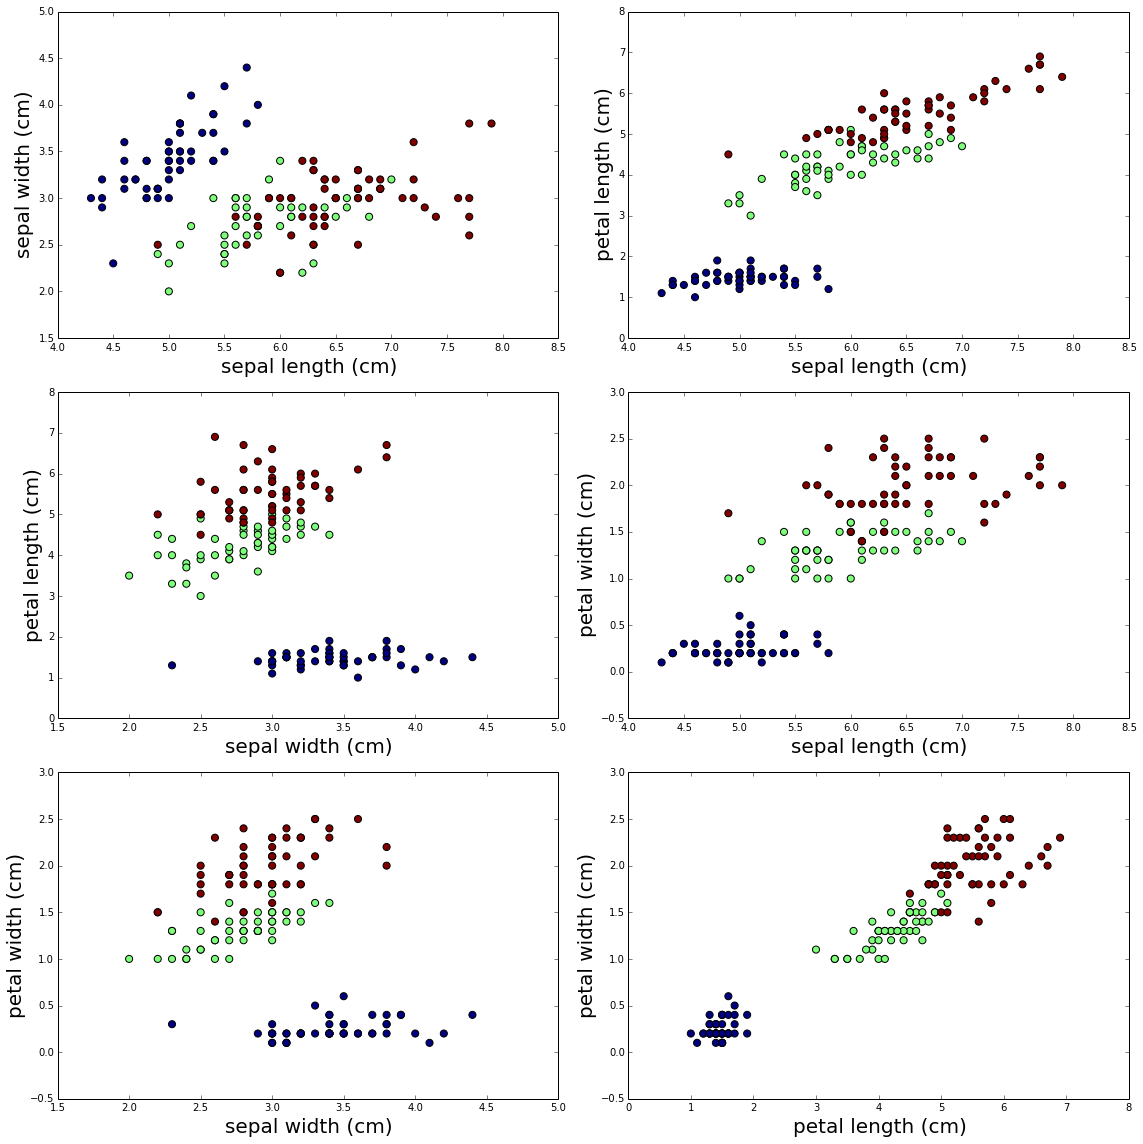

In [30]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

def plot(dataset, ax, i, j):
    ax.scatter(dataset.data[:,i], dataset.data[:,j], c=dataset.target, s=50)
    ax.set_xlabel(dataset.feature_names[i], fontsize=20)
    ax.set_ylabel(dataset.feature_names[j], fontsize=20)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(16,16))
plot(iris, ax1, 0, 1)
plot(iris, ax2, 0, 2)
plot(iris, ax3, 1, 2)
plot(iris, ax4, 0, 3)
plot(iris, ax5, 1, 3)
plot(iris, ax6, 2, 3)
f.tight_layout()
plt.show()

## Aplicación a Iris Dataset

Busquemos aplicar una relación lineal a cada clase. Para ello utilizamos 3 atributos para predecir el cuarto.

In [31]:
# REVISAR
import numpy as np
from sklearn import datasets
from sklearn import linear_model

# Loading the data
iris = datasets.load_iris()
X = iris.data
iris_label = iris.target

# Apply linear regression to each model
predictions = {}
regr = linear_model.LinearRegression(fit_intercept=True, normalize=False)
for label in range(0,3):
    X_train = X[iris_label==label][:,:-1]
    Y_train = X[iris_label==label][:,-1]
    regr.fit(X_train, Y_train) # Still must add the column of 1
    theta = regr.intercept_, regr.coef_
    print theta
    Y_pred = regr.predict(X_train)
    predictions[label] = Y_pred
    print "Error", np.linalg.norm(Y_train-Y_pred,2)/len(Y_pred)

(-0.27818082847266945, array([ 0.02511343,  0.04880502,  0.15686301]))
Error 0.013843047279
(-0.16863536289273662, array([-0.07398153,  0.22328352,  0.30875455]))
Error 0.0149885035578
(0.50025633713482898, array([-0.09258297,  0.43868844,  0.14967956]))
Error 0.0318560083144


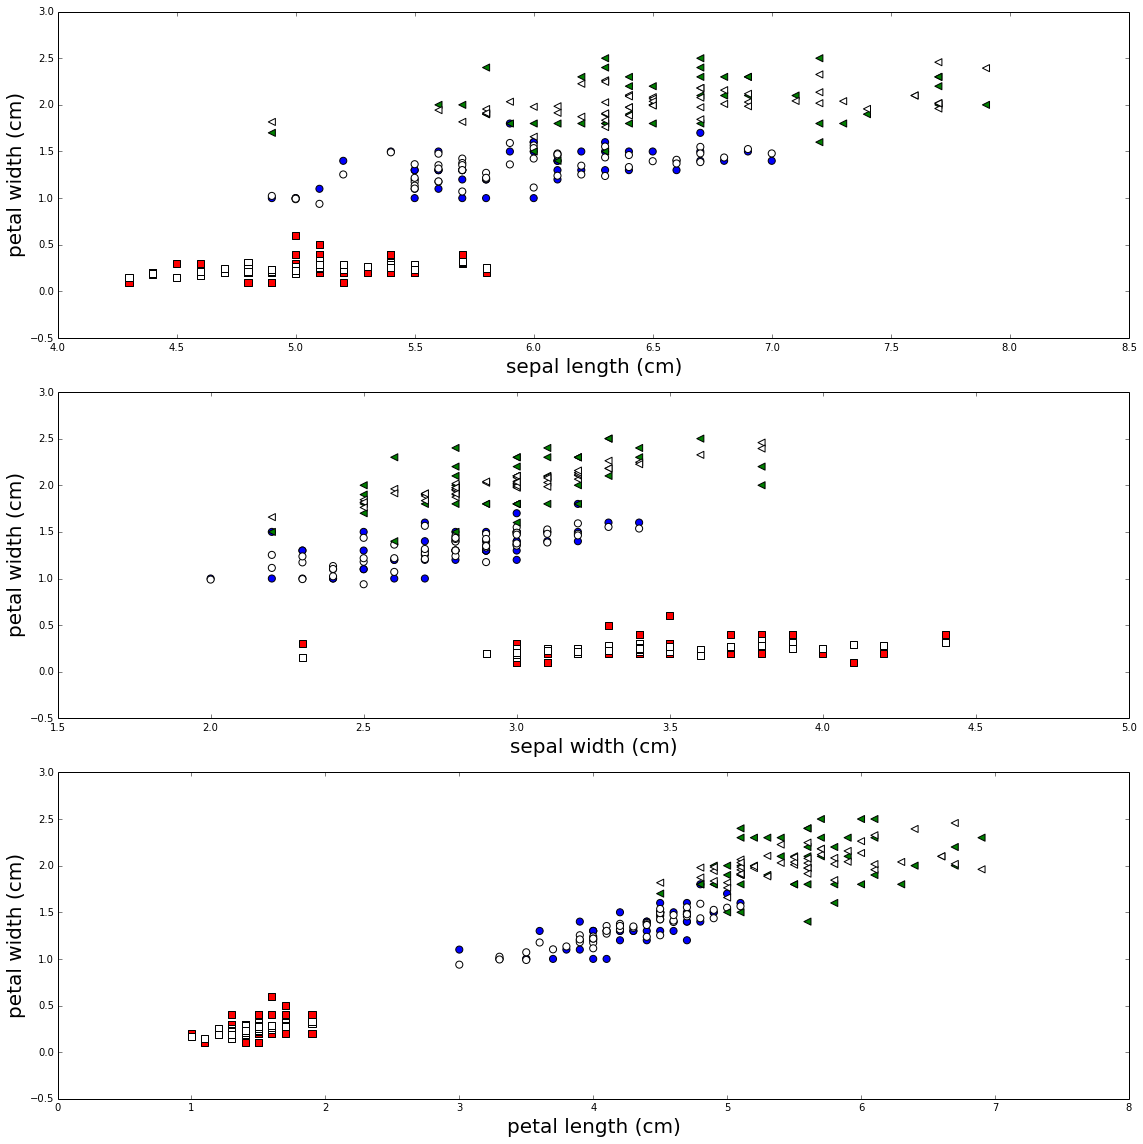

In [32]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

def plot(dataset, ax, i, j):
    colors  = {0:"r", 1:"b", 2:"g"}
    markers = {0:"s", 1:"o", 2:"<"}
    for label in range(3):
        x = dataset.data[:,i][dataset.target==label]
        y = dataset.data[:,j][dataset.target==label]
        ax.scatter(x, y, c=colors[label], marker=markers[label], s=50)
        if j==3:
            ax.scatter(x, predictions[label], c="w", marker=markers[label], 
                       s=50)
    ax.set_xlabel(dataset.feature_names[i], fontsize=20)
    ax.set_ylabel(dataset.feature_names[j], fontsize=20)
    
# row and column sharing
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))
plot(iris, ax1, 0, 3)
plot(iris, ax2, 1, 3)
plot(iris, ax3, 2, 3)
f.tight_layout()
plt.show()

## Referencias

* Jake VanderPlas, ESAC Data Analysis and Statistics Workshop 2014, https://github.com/jakevdp/ESAC-stats-2014
* Andrew Ng, Machine Learning CS144, Stanford University.